In [2]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import rasterio as rio
import pandas as pd
import glob
import pickle
import numpy as np
from csslconstants import *
from cmcrameri import cm
import rioxarray as rxr
from metloom.pointdata import CDECPointData
from metloom.variables import CdecStationVariables
import metloom
import geopandas as gpd
import datetime


homedir = '/home/marianne/Documents/cssltimeseries/'
homedir = '/global/home/users/cowherd/cssltimeseries/'
datadir = homedir + 'data/'
os.chdir(homedir)

datakeys = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)',
       '24-hour Total Precip (mm)', 'Season Total Precip (mm)',
       '% of Precip as Snow', '% of Precip as Rain', 'New Snow (cm)',
       'Season Total Snow (cm)', 'Snowpack depth (cm)',
       'Snow Water Equivalent (cm)', 'Remarks', 'dt']


In [3]:
dnbr = rxr.open_rasterio(datadir + 'caldor/caldor-dNBR.tiff')
p21 = gpd.read_file('/global/scratch/users/cowherd/snow_fires_data/InteragencyPerimeters2021/FH_Perimeter.shp')
caldor = p21[p21.OBJECTID==13419]
caldor.to_file(datadir + 'caldor/caldor.shp')
snowzone = gpd.read_file('/global/scratch/users/cowherd/snowzone/snowzone.shp')

/global/scratch/users/cowherd/.conda/envs/earthenv/lib/python3.8/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [4]:
vrs = [
    CdecStationVariables.SWE,
    CdecStationVariables.SNOWDEPTH
]
points = CDECPointData.points_from_geometry(caldor, vrs, snow_courses=True)
df = points.to_dataframe()
print(df)


            name   id datasource                                  geometry
0    FREEL BENCH  FBN       CDEC  POINT Z (-119.95000 38.85000 7300.00000)
1   LAKE AUDRAIN  ABN       CDEC  POINT Z (-120.03932 38.81983 7300.00000)
2       PHILLIPS  PHL       CDEC  POINT Z (-120.07200 38.81800 6800.00000)
3    ECHO SUMMIT  ECS       CDEC  POINT Z (-120.03898 38.82852 7450.00000)
4  TAMARACK FLAT  TMF       CDEC  POINT Z (-120.10300 38.80300 6550.00000)
5    CAPLES LAKE  CAP       CDEC  POINT Z (-120.04158 38.71079 8000.00000)
6          ALPHA  APH       CDEC  POINT Z (-120.21564 38.80414 7600.00000)


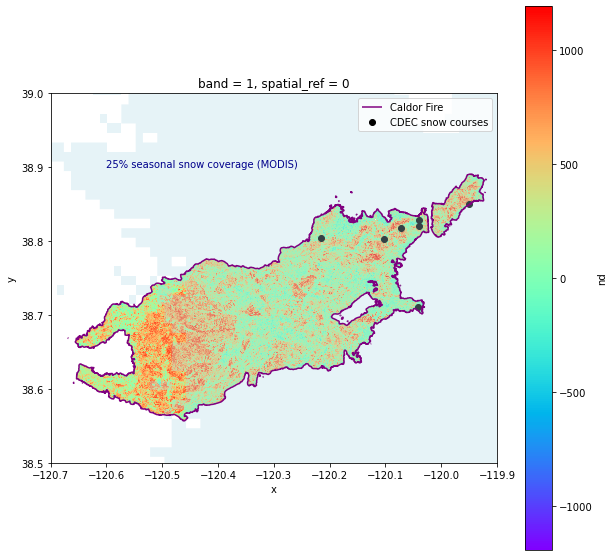

In [5]:
fig,ax=plt.subplots(figsize=(10,10))
dnbr.plot(ax=ax,cmap = 'rainbow', label = 'dNBR (tentative)')
caldor.boundary.plot(ax=ax, color ='purple', label = 'Caldor Fire')
df.plot(ax=ax, color = 'k', label = 'CDEC snow courses')
snowzone.plot(ax=ax, alpha =0.3, color = 'lightblue', label = '25% seasonal snow coverage', zorder=1)
ax.text(-120.6, 38.9, '25% seasonal snow coverage (MODIS)', color = 'darkblue')
ax.set_xlim((-120.7,-119.9))
ax.set_ylim((38.5,39))
plt.legend()
plt.show()

In [6]:
tmp  = metloom.pointdata.cdec.CDECPointData('FBN', 'FREEL BENCH', metadata=None)
tmp.get_snow_course_data(start_date = datetime.datetime(2019,1,1), end_date = datetime.datetime(2022,1,1), variables = vrs)

,,geometry,measurementDate,SWE,SWE_units,SNOWDEPTH,SNOWDEPTH_units,datasource
datetime,site,,,,,,,
2019-02-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2018-12-31 08:00:00+00:00,8.0,INCHES,24.0,INCHES,CDEC
2019-03-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2019-02-28 08:00:00+00:00,18.0,INCHES,56.0,INCHES,CDEC
2019-04-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2019-03-28 08:00:00+00:00,21.5,INCHES,56.0,INCHES,CDEC
2020-02-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2020-01-30 08:00:00+00:00,5.0,INCHES,17.0,INCHES,CDEC
2020-03-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2020-02-28 08:00:00+00:00,3.5,INCHES,9.0,INCHES,CDEC
2020-04-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2020-03-26 08:00:00+00:00,4.5,INCHES,23.0,INCHES,CDEC
2021-02-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2021-01-29 08:00:00+00:00,6.5,INCHES,29.0,INCHES,CDEC
2021-03-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2021-02-25 08:00:00+00:00,6.5,INCHES,20.0,INCHES,CDEC
2021-04-01 08:00:00+00:00,FBN,POINT Z (-119.95000 38.85000 7300.00000),2021-03-30 08:00:00+00:00,6.0,INCHES,16.0,INCHES,CDEC


In [7]:
## get fires in the caldor area
mtbs = gpd.read_file('/global/scratch/users/cowherd/mtbs_perimeter_data/mtbs_perims_DD.shp').to_crs('epsg:4326')
eldorado = gpd.read_file('/global/home/users/cowherd/pyrodiversity/data/spatial/eldorado_huc8/eldoradohuc8.shp').to_crs('epsg:4326')

In [8]:
localfirep = gpd.sjoin(mtbs, eldorado[1:])
# localfirep.keys()
years = [int(localfirep['Ig_Date'][i][0:4]) for i in localfirep.index]
start_days =[]
for i in localfirep.index:
    date = localfirep['Ig_Date'][i]
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:])
    doy = datetime.date(year = year, month=month, day = day).strftime('%j')
    start_days.append(int(doy))
output = gpd.GeoDataFrame(data = {'FIRE_NAME': localfirep['Incid_Name'],
                             'OBJECTID': localfirep['Event_ID'],
                             'Fire_Year': years},
                         geometry = localfirep.geometry)

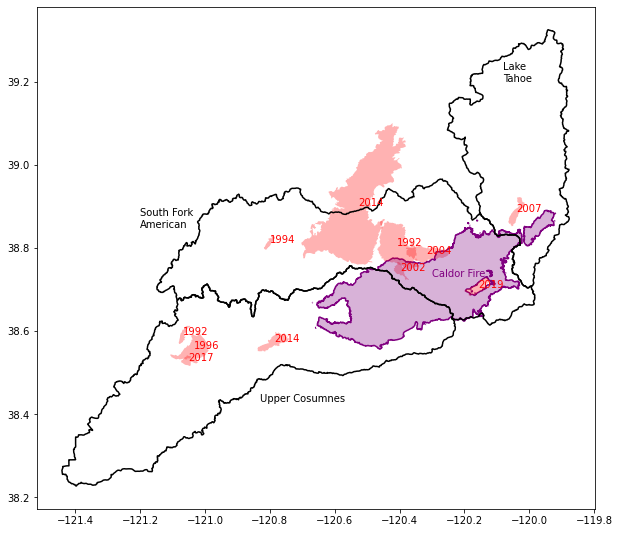

In [9]:
fig,ax=plt.subplots(figsize=(10,10))
eldorado[1:].boundary.plot(ax=ax,color='k')
output.plot(ax=ax,color='r',alpha=0.3)
caldor.plot(ax=ax, color = 'purple',alpha=0.3)
caldor.boundary.plot(ax=ax, color = 'purple',zorder=-1)
for idx in output.index:
    ax.text(output.geometry[idx].centroid.x,output.geometry[idx].centroid.y, str(output.Fire_Year[idx]),color = 'r')
ax.text(-120.08,39.2,'Lake\nTahoe',color= 'k')
ax.text(-120.83, 38.43,'Upper Cosumnes' ,color = 'k')
ax.text(-121.2, 38.85,'South Fork\nAmerican' ,color = 'k')
ax.text(-120.3, 38.73,'Caldor Fire',color = 'purple')
plt.show()

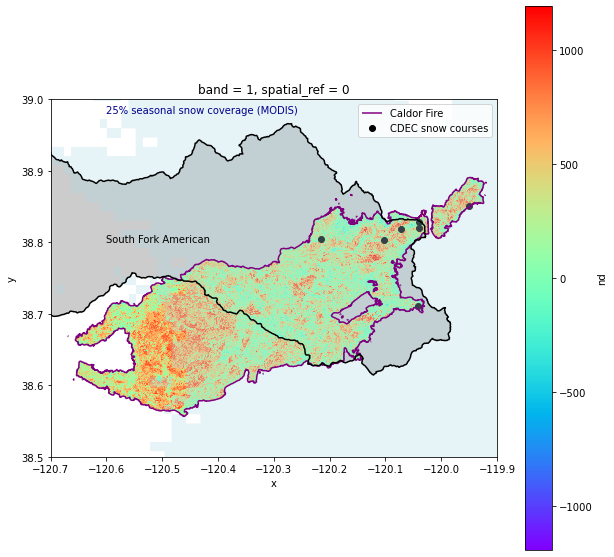

In [10]:
fig,ax=plt.subplots(figsize=(10,10))
eldorado[1:2].plot(ax=ax,color='k',alpha = 0.2)
dnbr.plot(ax=ax,cmap = 'rainbow', label = 'dNBR (tentative)')
caldor.boundary.plot(ax=ax, color ='purple', label = 'Caldor Fire')
df.plot(ax=ax, color = 'k', label = 'CDEC snow courses')
snowzone.plot(ax=ax, alpha =0.3, color = 'lightblue', label = '25% seasonal snow coverage', zorder=1)
ax.text(-120.6, 38.98, '25% seasonal snow coverage (MODIS)', color = 'darkblue')
eldorado[1:2].boundary.plot(ax=ax,color='k',alpha = 1)
ax.text(-120.6, 38.8, 'South Fork American')
ax.set_xlim((-120.7,-119.9))
ax.set_ylim((38.5,39))
plt.legend()
plt.show()

In [29]:
sites = gpd.read_file(datadir + 'sites_desc/sitesdesc.shp')
points = sites.centroid
sites.geometry = points
slope = rxr.open_rasterio(datadir + 'topo/slope.tif')
aspect = rxr.open_rasterio(datadir + 'topo/aspect.tif')
elev = rxr.open_rasterio(datadir + 'topo/elevation.tif')

/tmp/ipykernel_9502/141315430.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  points = sites.centroid


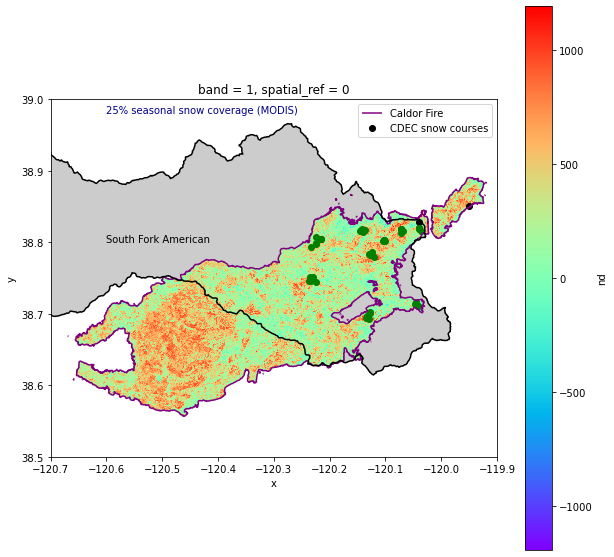

In [32]:
fig,ax=plt.subplots(figsize=(10,10))
eldorado[1:2].plot(ax=ax,color='k',alpha = 0.2)
dnbr.plot(ax=ax,cmap = 'rainbow', label = 'dNBR (tentative)')
caldor.boundary.plot(ax=ax, color ='purple', label = 'Caldor Fire')
df.plot(ax=ax, color = 'k', label = 'CDEC snow courses')
ax.text(-120.6, 38.98, '25% seasonal snow coverage (MODIS)', color = 'darkblue')
eldorado[1:2].boundary.plot(ax=ax,color='k',alpha = 1)
ax.text(-120.6, 38.8, 'South Fork American')
sites.plot(ax=ax, color = 'g')
ax.set_xlim((-120.7,-119.9))
ax.set_ylim((38.5,39))
plt.legend()
plt.show()


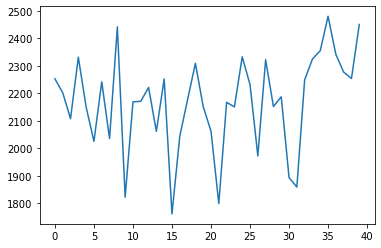

In [33]:
fig,ax = plt.subplots()
ax.plot(sites.elevation)

In [131]:
groups = [0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0]
sites['group'] = groups
for idx in sites.loc[(sites.geometry.x < -120.2) & (sites.geometry.y < 38.775)].index:
    sites.group[idx] = 0
for idx in sites.loc[(sites.geometry.x < -120.2) & (sites.geometry.y > 38.775)].index:
    sites.group[idx] = 1
for idx in sites.loc[(sites.geometry.x > -120.2) & (sites.geometry.x < -120.12) & (sites.geometry.y > 38.8)].index:
    sites.group[idx] = 2
for idx in sites.loc[(sites.geometry.x > -120.15) & (sites.geometry.x < -120.10) 
      & (sites.geometry.y > 38.75) & (sites.geometry.y < 38.8)].index:
    sites.group[idx] = 3
for idx in sites.loc[(sites.geometry.x > -120.11) & (sites.geometry.x < -120.09) 
      & (sites.geometry.y > 38.775) & (sites.geometry.y < 38.825)].index:
    sites.group[idx] = 4
for idx in sites.loc[(sites.geometry.x > -120.10) & (sites.geometry.x < -120.05) 
      & (sites.geometry.y > 38.8) & (sites.geometry.y < 38.825)].index:
    sites.group[idx] = 5
for idx in sites.loc[(sites.geometry.x > -120.05) & (sites.geometry.x < -120.00) 
      & (sites.geometry.y > 38.78) & (sites.geometry.y < 38.83)].index:
    sites.group[idx] = 6
for idx in sites.loc[(sites.geometry.x > -120.09) & (sites.geometry.x < -120.00) 
      & (sites.geometry.y > 38) & (sites.geometry.y < 38.73)].index:
    sites.group[idx] = 7
for idx in sites.loc[(sites.geometry.x > -120.15) & (sites.geometry.x < -120.10) 
      & (sites.geometry.y > 38.6) & (sites.geometry.y < 38.72)].index:
    sites.group[idx] = 8
cdec = [0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0,
         0,0,0,0,0]
cdec[27] = 1
cdec[5] = 1
cdec[2] = 1
cdec[25] = 1
cdec[8] = 1 
sites['cdec'] = cdec



/tmp/ipykernel_9502/3232807271.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.group[idx] = 0
/tmp/ipykernel_9502/3232807271.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.group[idx] = 1
/tmp/ipykernel_9502/3232807271.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.group[idx] = 2
/tmp/ipykernel_9502/3232807271.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

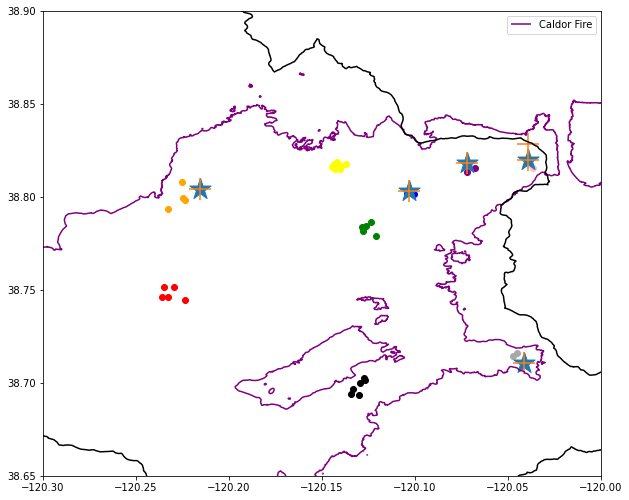

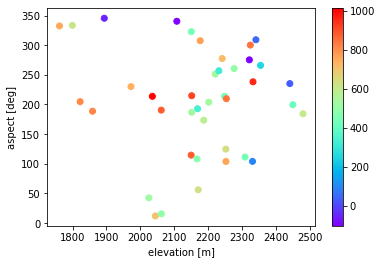

In [136]:

fig,ax=plt.subplots(figsize=(10,10))
caldor.boundary.plot(ax=ax, color ='purple', label = 'Caldor Fire')
# df.plot(ax=ax, color = 'k', label = 'CDEC snow courses')
eldorado[1:2].boundary.plot(ax=ax,color='k',alpha = 1)
sites[sites.group == 0].plot(ax=ax, color = 'r')
sites[sites.group == 1].plot(ax=ax, color = 'orange')
sites[sites.group == 2].plot(ax=ax, color = 'yellow')
sites[sites.group == 3].plot(ax=ax, color = 'green')
sites[sites.group == 4].plot(ax=ax, color = 'b')
sites[sites.group == 5].plot(ax=ax, color = 'purple')
sites[sites.group == 6].plot(ax=ax, color = 'pink')
sites[sites.group == 7].plot(ax=ax, color = 'darkgray')
sites[sites.group == 8].plot(ax=ax, color = 'black')

sites[sites.cdec == 1].plot(ax=ax, markersize = 500, marker = '*')
df.plot(ax=ax, marker = '+',markersize=500)

ax.set_xlim((-120.3,-120))
ax.set_ylim((38.65,38.9))
plt.legend()
plt.show()


groupmean = sites.groupby('group').mean()
groupstd = sites.groupby('group').std()
fig,ax=plt.subplots()
CM = ax.scatter(sites.elevation, sites.aspect, c=sites.dnbr, cmap ='rainbow')
plt.colorbar(CM)
ax.set_xlabel('elevation [m]')
ax.set_ylabel('aspect [deg]')
plt.show()

In [83]:
for idx in sites.loc[(sites.geometry.x > -120.15) & (sites.geometry.x < -120.10) 
& (sites.geometry.y > 38.6) & (sites.geometry.y < 38.7)].index:
    sites.group[idx] = 1


/tmp/ipykernel_9502/574677136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sites.group[idx] = 1


In [130]:
print(df, sites.loc[sites.group == 7])



            name   id datasource                                  geometry
0    FREEL BENCH  FBN       CDEC  POINT Z (-119.95000 38.85000 7300.00000)
1   LAKE AUDRAIN  ABN       CDEC  POINT Z (-120.03932 38.81983 7300.00000)
2       PHILLIPS  PHL       CDEC  POINT Z (-120.07200 38.81800 6800.00000)
3    ECHO SUMMIT  ECS       CDEC  POINT Z (-120.03898 38.82852 7450.00000)
4  TAMARACK FLAT  TMF       CDEC  POINT Z (-120.10300 38.80300 6550.00000)
5    CAPLES LAKE  CAP       CDEC  POINT Z (-120.04158 38.71079 8000.00000)
6          ALPHA  APH       CDEC  POINT Z (-120.21564 38.80414 7600.00000)       elevation  period type_name  \
8   2441.402597     0.0     Image   
35  2480.219917     0.0     Image   
39  2450.278689     0.0     Image   

                                                thumb      slope  \
8   https://mw1.google.com/ges/dd/images/SRTM90_V4...   4.877133   
35  https://mw1.google.com/ges/dd/images/SRTM90_V4...  10.143861   
39  https://mw1.google.com/ges/dd/images/SRTM90